<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Statistic/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Importando los datos


Primeramente importamos algunas de las librerias que vamos a usar. Principalmente enfocadas ala manejo de datos y gráficas.

In [52]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Accedemos al path donde está el Data Set. En este caso tenemos información financiera de las empresas de EU a partir del año 2000;

In [53]:
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/DataSetIA/US_dataset"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/DataSetIA/US_dataset
/content/gdrive/MyDrive/DataSetIA/US_dataset
dataus2023.csv	firmsus2023.csv


In [54]:
data = pd.read_csv('dataus2023.csv')
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,2000,NaN,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,2000,1453000.0,2000.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,2000,1581000.0,2000.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,2000,1741000.0,2000.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,2001,1821000.0,2001.0


In [55]:
firms = pd.read_csv('firmsus2023.csv')
firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.1,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [56]:
firms_selected=firms[["empresa","Nombre","status","naics1"]]
firms_selected.columns=['firm',"Empresa","status","industria"]
data =firms_selected.merge(data, on='firm', how='left')
data['qy'] = data['q'].str[:4]
data['qn'] = data['q'].str[5]
data.head()

,firm,Empresa,status,industria,q,fiscalmonth,revenue,cogs,sgae,otherincome,...,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qy,qn
0,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.332411,104.0000,452000.000,2000.0,NaN,NaN,2000,1
1,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,...,2186000.0,0.0,44.911205,73.7500,452271.967,2000.0,1453000.0,2000.0,2000,2
2,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,...,2510000.0,0.0,29.801249,48.9375,453014.579,2000.0,1581000.0,2000.0,2000,3
3,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,...,2758000.0,0.0,33.340861,54.7500,456366.381,2000.0,1741000.0,2000.0,2000,4
4,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,...,3070000.0,0.0,18.713509,30.7300,456769.737,2001.0,1821000.0,2001.0,2001,1


Como se puede ver tenemos dos DataSet que se relacionan. Con el fin de tener toda la información relevante en un dataset vamos a mezclar los dataframe de data y firms. De esta manera tendremos la información financiera junto con la meta data de cada una de las empresas.

## 0.1 Tranformando los tipos de datos

In [57]:
data['qdate']=pd.PeriodIndex(data.q, freq='Q')

## 0.2 Más informacion relevante


A continuación agregamos información derivada del dataset
original. Son indicadores econcómicos que nos ayudan a entender mejor la economía de EU.


In [58]:
data['ry']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))
# ebit = revenue - cogs - sgae
data['ebit']=data['revenue'] - data['cogs'] - data['sgae']

#opm = ebit / revenue
# data['opm']=data['ebit']/ data['revenue'] -> Hay que hacer las validaciones de que el divisor sea distinton de 0
data['opm']= np.where(data['revenue']==0,np.NaN, data['ebit']/ data['revenue'])
# Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit']+ data['otherincome'] +data['extraordinaryitems'] - data['finexp'] -data['incometax']

#Calculate profit margin (ratio) as: pm = ni / revenue
data['pm'] = np.where(data['revenue']==0,np.NaN, data['netincome']/ data['revenue'])

#Calculate asset turn over ratio: ato = revenue / totalassets
data['ato'] = np.where(data['totalassets']==0,np.NaN, data['revenue']/ data['totalassets'])

#Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio']= np.where(data['currentliabilities']==0,np.NaN, data['currentassets']/ data['currentliabilities'])

#Calculate financial leverage ratio as: finlev=longdebt / totalassets
data['finlev'] = np.where(data['totalassets']==0,np.NaN, data['longdebt']/ data['totalassets'])

#Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue']=data['originalprice']*data['sharesoutstanding']

#Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']

#Retornos futuros a 1 y 4 trimestres
data['f1rq']= data.groupby(['firm'])['rq'].shift(-1)
data['f4rq']= data.groupby(['firm'])['rq'].shift(-4)

#Retornos futuros a 1 y 4 años
data['f1ry']= data.groupby(['firm'])['ry'].shift(-1)
data['f4ry']= data.groupby(['firm'])['ry'].shift(-4)

#Separción del número de trimestre y año
data['qy'] = data['q'].str[:4]
data['qn'] = data['q'].str[5]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533089 entries, 0 to 533088
Data columns (total 43 columns):
 #   Column              Non-Null Count   Dtype        
---  ------              --------------   -----        
 0   firm                533089 non-null  object       
 1   Empresa             533089 non-null  object       
 2   status              533089 non-null  object       
 3   industria           533089 non-null  object       
 4   q                   533088 non-null  object       
 5   fiscalmonth         240848 non-null  float64      
 6   revenue             240837 non-null  float64      
 7   cogs                240837 non-null  float64      
 8   sgae                209734 non-null  float64      
 9   otherincome         240837 non-null  float64      
 10  extraordinaryitems  209734 non-null  float64      
 11  finexp              240837 non-null  float64      
 12  incometax           240837 non-null  float64      
 13  totalassets         240842 non-null  float64

In [60]:
data.columns

Index(['firm', 'Empresa', 'status', 'industria', 'q', 'fiscalmonth', 'revenue',
       'cogs', 'sgae', 'otherincome', 'extraordinaryitems', 'finexp',
       'incometax', 'totalassets', 'currentassets', 'inventory',
       'totalliabilities', 'currentliabilities', 'longdebt', 'adjprice',
       'originalprice', 'sharesoutstanding', 'year', 'fixedassets', 'yearf',
       'qy', 'qn', 'qdate', 'ry', 'rq', 'ebit', 'opm', 'netincome', 'pm',
       'ato', 'acidratio', 'finlev', 'mvalue', 'bookvalue', 'f1rq', 'f4rq',
       'f1ry', 'f4ry'],
      dtype='object')

Copia de los datasets y subdatasets que usaremos


In [61]:
#Dataframe general
#data: Este dataset tiene TODA la información original de los datasets originales, además los cálculos financieros.

#Dataframe manofactura
#df_m:  Filtro por indudria. Año cierre del año fiscal 2022
df_m=data.copy()
df_m=df_m[(df_m['fiscalmonth']==12) & (df_m['industria']=="Industrias manufactureras") ]
#print(df_m.info())

#Dataframe manofactura año 2022
df=df_m.copy()
df=df[df['qy']=='2022']
df_m_2022=df.copy();


#1 Estadistica avanzada


## 1.1 Analitica descriptiva


### Análisis de los ratios: Comparando media ponderada ,media y mediana.

In [62]:
#df_m.describe()

Preparamos el dataset para trabajar con los ratios

In [63]:
#Trabajamos con el dataset de manofactura
df=df_m.copy()
#Selección de las columnas que corresponden a un ratio, sus denominadores y numeradores
ratios_columns=     ['opm'    ,'pm'        ,'ato'         ,'acidratio'         ,'finlev' ]
numerators_columns= ['ebit'   ,'netincome' ,'revenue'     ,'currentassets'     ,'longdebt']
denomintaor_columns=['revenue','revenue'   ,'totalassets' ,'currentliabilities','totalassets']

Con la ayuda de .decribe() vamos a encontrar la media y mediana de los ratios. Los pesos ponderados los calcularemos de manera manual y desplegaremos toda la información de los ratios en un mismo dataframe.

In [64]:
df_stats=df[ratios_columns].describe().T[['mean','50%','std']].T
weight_mean=np.zeros(len(ratios_columns), dtype = float)
for i in range(len(ratios_columns)):
  name=ratios_columns[i]
  weight_mean[i]=df[numerators_columns[i]].sum()/df[denomintaor_columns[i]].sum()

df_stats=df_stats.T
df_stats['weight mean']=weight_mean
print(df_stats)

                mean       50%          std  weight mean
opm       -15.887496  0.058384   271.091221     0.112128
pm        -17.242080  0.034617   310.680516     0.074770
ato        27.267082  0.728471  3994.528689     0.743507
acidratio   4.255778  2.527482     5.969562     1.593503
finlev      0.227802  0.141703     3.551665     0.234689


Hasta ahora hemos calculado la media, mediana y media ponderada de la industria manofacturera. ¿Qué medida es la más representativa?¿Qué podemos decir del profit margin y asset turn over de la industria manofaturera?

La media es el mejor punto de referencia cuando tenemos una distribución de datos normales, en dichas situaciones la media y mediana suelen ser muy parecidas.

En este caso tenemos todo lo contrario. Una dispersión de datos muy grande, la desviación estandar se aleja mucho de lo limites.
Por poner un ejemplo, la media de pm es -17 y su desviación estándar de 310. Teniendo en contexto que el profit margin de las empresas en casi todos los casos es positivo. Si se comportaran de manera normal estos datos estaríamos afirmando que más del 50% de los casos el pm es negativo. Pues habría 50% de los datos a la izquierda del -17 y otro 50% a su derecha.

 No podemos decir que alguna de estas medidas represente el comportamiento de la industria manofacturera en los últimos años.

Cuando utilizamos **la media ponderada** estamos tratando a la industria manofacturera como una sola entidad, no busca describir el comportamiento de una empresa promedio o típica, describe el comportamiento del sector, **es la mejor medida de tendencia cuando tenemos empresas tan pequeñas o tan grandes**, de esta manera el peso de cada empresa corresponde al poder explicativo que tiene sobre el comportamiento del sector.


**Profit Margin de la industria manofacturera**
*   pm = 0.074770

*Tenemos que de todos los ingresos de la industria manofacturera en los últimos 20 años se capitaliza el 7.4% de los ingresos como ganancias.*

**Asset turn over de la industria manofacturera**

*   ato = 0.743507

*Tenemos que el ato es la capacidad de una empresa para convertir sus activos en ganancias. De acuerdo a esta información la industria manofacturera en un periodo de un año ha logrado transformar el 74% del valor de sus activos en ganancias en un año durante los útltimos 20 años.*

**Con esto podemos decir que la industria manofacturera desde el año 2000 ha mostrado una buena salud financiera**


In [65]:
#Replicamos el proceso para el año 2022
df=df_m_2022.copy()
ratios_columns=     ['opm'    ,'pm'        ,'ato'         ,'acidratio'         ,'finlev' ]
numerators_columns= ['ebit'   ,'netincome' ,'revenue'     ,'currentassets'     ,'longdebt']
denomintaor_columns=['revenue','revenue'   ,'totalassets' ,'currentliabilities','totalassets']
df_stats=df[ratios_columns].describe().T[['mean','50%','std']].T
weight_mean=np.zeros(len(ratios_columns), dtype = float)
for i in range(len(ratios_columns)):
  name=ratios_columns[i]
  weight_mean[i]=df[numerators_columns[i]].sum()/df[denomintaor_columns[i]].sum()
df_stats=df_stats.T
df_stats['weight mean']=weight_mean
print(df_stats)

                mean       50%         std  weight mean
opm       -16.560193  0.017023  153.669643     0.140551
pm        -16.653901  0.002706  154.864213     0.104924
ato         0.615782  0.540319    0.658827     0.738371
acidratio   4.962033  2.688329    6.345052     1.455796
finlev      0.227349  0.152002    0.761827     0.260951


Año 2022: Media ponderadas

*   pm = 0.104924
*   ato = 0.738371

Haciendo el mismo análisis con solo el año 2022, podemos ver que la capacidad de convertir los activos en gananacias es casi la misma. Pero a comparación del registro históricon en el año 2022 el margen de ganancias está 3% por encima. **Es decir el año 2022 ha sido un buen años financieramente hablando para la industria manofacturera. A comparación de su histórico ha tiene un margen de ganancias 3% mayor en este último año.**

##1.2 Regresión lineal multiple

A continuación vamos a predecir lor retornos trimestrales proyectados a un año. Para eso vamos a agregar variables de efecto indirecto y hacer limpieza de valiores extremos para mejorar el modelo.

### 1.2.1 Calculo de variables para la regresión



#### Clasificación por tamaño
Agregaremos etiquetas de tamaño a cada empresa. Las clasificaremos en pequeña mediana y grande de acuerdo al percentil en el que se encuentren. Vamos a hacer una partición en 3 partes iguales con los cuartiles 33% y 66%.

In [66]:
df=df_m.copy();
# Calculate percentiles
limits=[0.3333,0.6666]
percentiles = df['mvalue'].quantile(limits)

# Define function to categorize values
def categorize_size(value):
    if value <= percentiles[limits[0]]:
        return 'small'
    elif value <= percentiles[limits[1]]:
        return 'medium'
    else:
        return 'big'

# Apply the categorize_size function to create the "size" column
df['size'] = df['mvalue'].apply(categorize_size)


Histograma para entender la distribución del valor de
mercado con las etiquetas por tamaño de empresa.

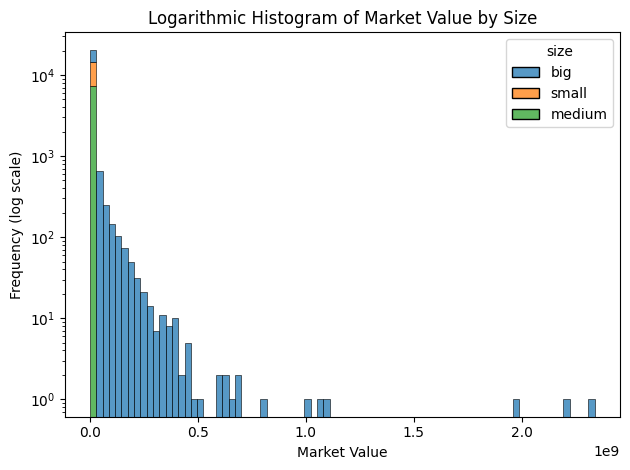

In [67]:
# Create a histogram with colors based on 'size'
sns.histplot(data=df, x='mvalue', bins=80, log_scale=(False, True), hue='size', multiple='stack')

plt.xlabel('Market Value')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram of Market Value by Size')

plt.tight_layout()
plt.show()


Hay que tener en cuenta que la escala es logaritmica. Los valores de mercado son abismales en las empresas grandes. En la empresa pequeña y mediana tienen menos cifras que las empresas grandes.

Comprobamos que tengan tamaños similares después de hacer el One-hot-encoding con size

#### Dummie encoding por tamaño de la empresa

Vamos a obtener columnas adicionales donde nos indica si es de tamaño chica, mediana o grande.

IMPORTANTE: Por fines prácticos calculamos los 3 dummies, uno por cada tamaño. Pero en los siguientes pasos solo usaremos lo dummies de big y small ya que vamos a hacer el análisis de efecto indirecto tomando como grupo base aquellas empresas que son de tamaño mediano.

In [68]:
#Dummie encoding
df = pd.get_dummies(df, columns=['size'], prefix='size')
df[['size_big','size_medium','size_small']].describe()

,size_big,size_medium,size_small
count,22854.000000,22854.000000,22854.000000
mean,0.362737,0.318631,0.318631
std,0.480800,0.465956,0.465956
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


#### Calculando otras variables
Vamos a hacer algunas simplificaciones matemáticas para simplificar la formula de los ratios:
*   Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice.
*   Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice
*   Calculate book-to-market ratio: bmr = bookvalue / marketvalue

**Tenemos que oepsp=  (ebit / sharesoutstanding) / originalprice = (ebit / (originalprice * sharesoutstanding)) = ebit / mvalue**

**De igual manera epsp =  (netincome / sharesoutstanding) / originalprice = netincome / mvalue**

In [69]:
df['oepsp']=np.where(df['mvalue']==0,np.NaN, df['ebit']/ df['mvalue'])
df['epsp']=np.where(df['mvalue']==0,np.NaN, df['netincome']/ df['mvalue'])
df['bmr']=np.where(df['mvalue']==0,np.NaN, df['bookvalue']/ df['mvalue'])

Este dataset en un principio contenia la información de la industria manofacturera en todos los trimestres. Ahora hemos agregado los dummies por tamaño y otras variables extra. Vamos a guardar este dataset como df_regression.

In [70]:
df_regression=df
df.describe()

,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,f1rq,f4rq,f1ry,f4ry,size_big,size_medium,size_small,oepsp,epsp,bmr
count,22854.0,2.285300e+04,2.285300e+04,2.281900e+04,2.285300e+04,2.281900e+04,2.285300e+04,2.285300e+04,2.285300e+04,2.285300e+04,...,21961.000000,20377.000000,21021.000000,20164.000000,22854.000000,22854.000000,22854.000000,21813.000000,21813.000000,2.184700e+04
mean,12.0,4.944830e+06,3.147325e+06,1.244734e+06,-3.878167e+03,2.125600e+04,6.231861e+04,1.397585e+05,6.650686e+06,2.596415e+06,...,-0.004348,-0.010322,-0.047014,-0.043082,0.362737,0.318631,0.318631,6.349524,-10.268930,5.795745e+02
std,0.0,1.888714e+07,1.274259e+07,6.008502e+06,1.340770e+06,3.790344e+05,4.958736e+05,9.809510e+05,2.905202e+07,1.458711e+07,...,0.315302,0.325841,0.657188,0.634023,0.480800,0.465956,0.465956,1736.639845,2598.833705,8.291206e+04
min,12.0,-9.323700e+04,-2.924200e+04,-2.907000e+06,-4.266200e+07,-7.827000e+06,-3.041000e+06,-3.483100e+07,0.000000e+00,0.000000e+00,...,-2.862201,-4.259548,-8.748305,-10.685795,0.000000,0.000000,0.000000,-112486.659552,-357470.651014,-7.280929e+01
25%,12.0,4.367100e+04,1.335100e+04,4.747666e+04,-1.094000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.354710e+05,9.293700e+04,...,-0.126968,-0.128293,-0.296986,-0.276850,0.000000,0.000000,0.000000,-0.085405,-0.096918,1.887151e-01
50%,12.0,6.034460e+05,3.320000e+05,1.841390e+05,0.000000e+00,0.000000e+00,2.467000e+03,4.347000e+03,7.689560e+05,3.851670e+05,...,0.021277,0.027399,0.034835,0.051334,0.000000,0.000000,0.000000,0.036787,0.022539,3.530152e-01
75%,12.0,2.777996e+06,1.740461e+06,6.321905e+05,1.207000e+03,0.000000e+00,3.554500e+04,5.770000e+04,3.188253e+06,1.329800e+06,...,0.145673,0.150251,0.290456,0.295408,1.000000,1.000000,1.000000,0.082026,0.053608,6.055761e-01
max,12.0,4.670290e+08,3.068020e+08,2.364170e+08,1.274390e+08,1.590840e+07,2.620900e+07,3.716200e+07,7.977690e+08,5.033250e+08,...,2.287206,2.708050,4.677828,3.601481,1.000000,1.000000,1.000000,229224.858601,139730.031729,1.224872e+07


### Modelo de regresión para predecir el retorno anual
**Variable dependiente:**

*   Retorno anual ('f1ry')

**Variables independientes**

*   Size dummies ('size_big','size_small')
*   Operating earnings per share deflated by stock price ('oepsp')
*   Earnings per share deflated by stock price ('epsp')
*   BookValue-MarketValue Ration ('bmr)


#### Filtro de solo las variables que vamos a utilizar para esta regresión.

In [71]:
df=df_regression.copy()
analized=['size_big','size_small','pm','ato','oepsp','epsp','bmr','f1ry']
df[analized]
df.describe()


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,f1rq,f4rq,f1ry,f4ry,size_big,size_medium,size_small,oepsp,epsp,bmr
count,22854.0,2.285300e+04,2.285300e+04,2.281900e+04,2.285300e+04,2.281900e+04,2.285300e+04,2.285300e+04,2.285300e+04,2.285300e+04,...,21961.000000,20377.000000,21021.000000,20164.000000,22854.000000,22854.000000,22854.000000,21813.000000,21813.000000,2.184700e+04
mean,12.0,4.944830e+06,3.147325e+06,1.244734e+06,-3.878167e+03,2.125600e+04,6.231861e+04,1.397585e+05,6.650686e+06,2.596415e+06,...,-0.004348,-0.010322,-0.047014,-0.043082,0.362737,0.318631,0.318631,6.349524,-10.268930,5.795745e+02
std,0.0,1.888714e+07,1.274259e+07,6.008502e+06,1.340770e+06,3.790344e+05,4.958736e+05,9.809510e+05,2.905202e+07,1.458711e+07,...,0.315302,0.325841,0.657188,0.634023,0.480800,0.465956,0.465956,1736.639845,2598.833705,8.291206e+04
min,12.0,-9.323700e+04,-2.924200e+04,-2.907000e+06,-4.266200e+07,-7.827000e+06,-3.041000e+06,-3.483100e+07,0.000000e+00,0.000000e+00,...,-2.862201,-4.259548,-8.748305,-10.685795,0.000000,0.000000,0.000000,-112486.659552,-357470.651014,-7.280929e+01
25%,12.0,4.367100e+04,1.335100e+04,4.747666e+04,-1.094000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.354710e+05,9.293700e+04,...,-0.126968,-0.128293,-0.296986,-0.276850,0.000000,0.000000,0.000000,-0.085405,-0.096918,1.887151e-01
50%,12.0,6.034460e+05,3.320000e+05,1.841390e+05,0.000000e+00,0.000000e+00,2.467000e+03,4.347000e+03,7.689560e+05,3.851670e+05,...,0.021277,0.027399,0.034835,0.051334,0.000000,0.000000,0.000000,0.036787,0.022539,3.530152e-01
75%,12.0,2.777996e+06,1.740461e+06,6.321905e+05,1.207000e+03,0.000000e+00,3.554500e+04,5.770000e+04,3.188253e+06,1.329800e+06,...,0.145673,0.150251,0.290456,0.295408,1.000000,1.000000,1.000000,0.082026,0.053608,6.055761e-01
max,12.0,4.670290e+08,3.068020e+08,2.364170e+08,1.274390e+08,1.590840e+07,2.620900e+07,3.716200e+07,7.977690e+08,5.033250e+08,...,2.287206,2.708050,4.677828,3.601481,1.000000,1.000000,1.000000,229224.858601,139730.031729,1.224872e+07


#### Versión 1 : Regresión
Antes de tratar las variables vamos a correr una primera versión de la regresión para ver cómo va evolucionando

In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['size_big','size_small','pm','ato','oepsp','epsp','bmr']]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()

In [73]:
# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Print the VIF values
print(vif_data)

     Variable         VIF
0       const    3.139209
1    size_big    1.362822
2  size_small    1.364654
3          pm    1.001521
4         ato    1.000077
5       oepsp   80.626416
6        epsp  432.674986
7         bmr  240.500573


In [74]:
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     542.3
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:43:21   Log-Likelihood:                -19257.
No. Observations:               21021   AIC:                         3.853e+04
Df Residuals:                   21013   BIC:                         3.859e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0493      0.007      6.775      0.0

RESUMEN:
*   Una R^2 de 0.15. Es un modelo malo.
*   Detectamos alta colinealidad en algunas variables.
*    Tenemos T values significativos en todas las variables a excepción de pm y ato.

Ideas:
*   Que sea un empresa grande es significativo para el aumento de la variable dependiente. Es decir, las empresas grandes tienen mayores retornos trimestrales proyectados a un año.
*   Analogamente, que sea una empresa pequeña es significativo para tener menores retornos.




### 1.2.2 Winsorización


#### Obtenemos el dataset base para la regresión y filtramos las variables que vamos a utilizar.

Estadistica descriptiva

In [75]:
df=df_regression.copy()
analized=['size_big','size_small','pm','ato','oepsp','epsp','bmr','f1ry']
df=df[analized]
df.describe()

,size_big,size_small,pm,ato,oepsp,epsp,bmr,f1ry
count,22854.000000,22854.000000,21162.000000,22852.000000,21813.000000,21813.000000,2.184700e+04,21021.000000
mean,0.362737,0.318631,-17.242080,27.267082,6.349524,-10.268930,5.795745e+02,-0.047014
std,0.480800,0.465956,310.680516,3994.528689,1736.639845,2598.833705,8.291206e+04,0.657188
min,0.000000,0.000000,-24414.000000,-0.145279,-112486.659552,-357470.651014,-7.280929e+01,-8.748305
25%,0.000000,0.000000,-0.127081,0.370506,-0.085405,-0.096918,1.887151e-01,-0.296986
50%,0.000000,0.000000,0.034617,0.728471,0.036787,0.022539,3.530152e-01,0.034835
75%,1.000000,1.000000,0.089863,1.101250,0.082026,0.053608,6.055761e-01,0.290456
max,1.000000,1.000000,1245.779412,603848.692765,229224.858601,139730.031729,1.224872e+07,4.677828


Vamos a graficar los histogramas de algunas variables para ver cómo se agrupan.

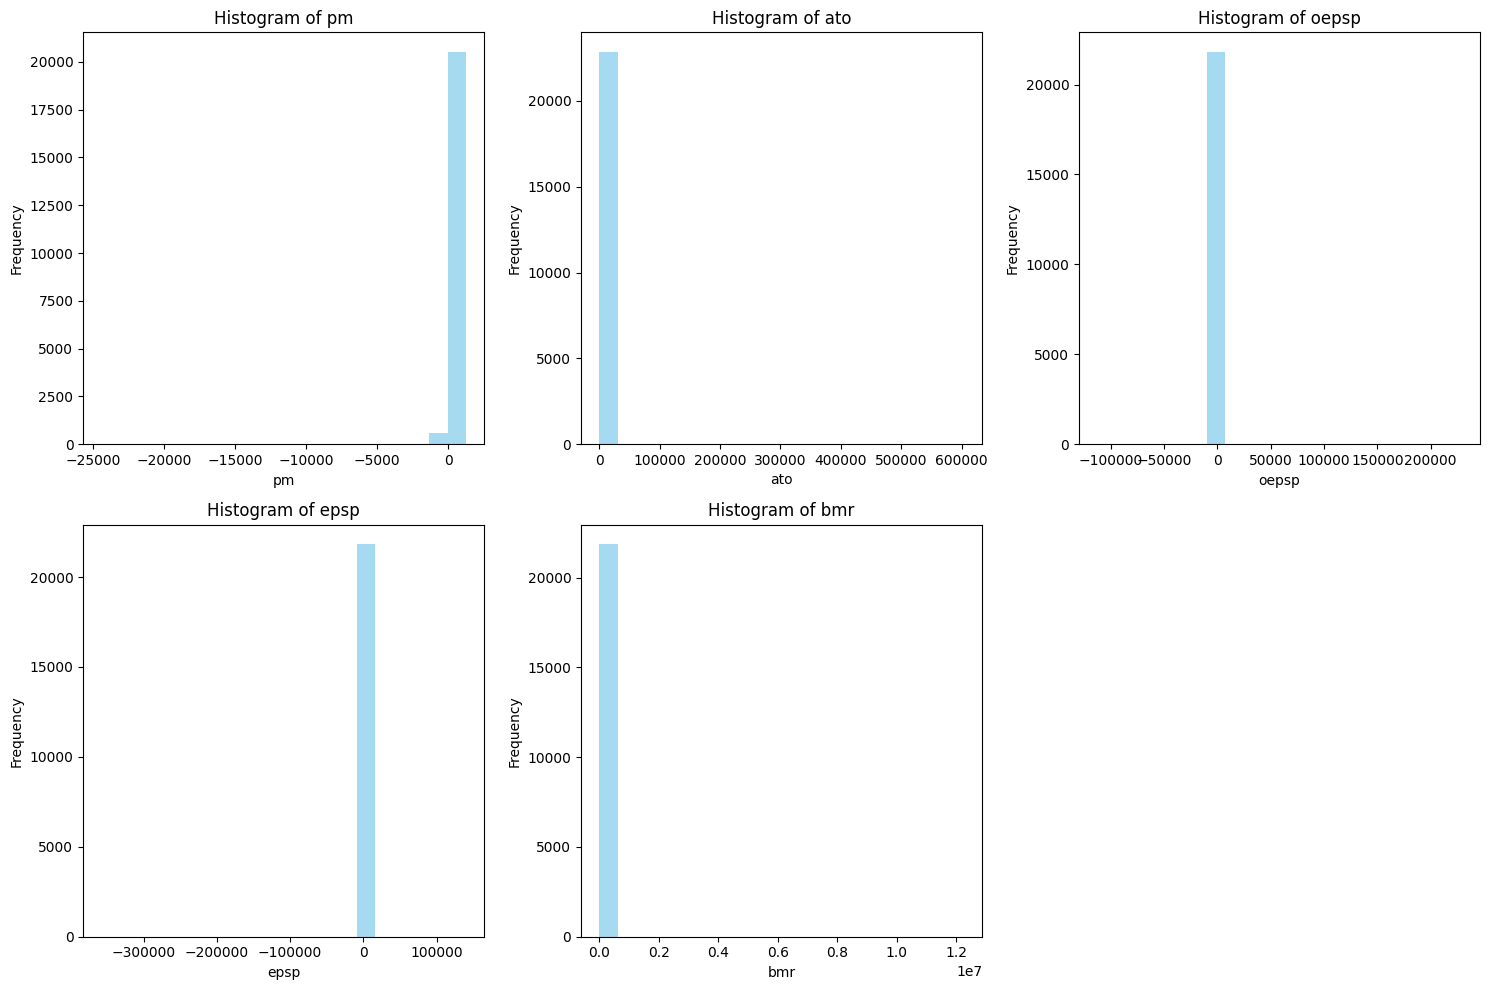

In [76]:
# Create histograms
var2plot=['pm','ato','oepsp','epsp','bmr']
plt.figure(figsize=(15, 10))
for i, column in enumerate(var2plot):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[column], bins=20, color='skyblue', alpha=0.75)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

#### Winsorización manual
Vamos a aplicar una winsorización manual. Es decir vamos a personalizar el porcentaje que se va a extraer de cada variable. Con la estádistica descriptiva anterior vamos a buscar valores que mejoren el error estándar. Notese que tenemos medias no mayores a 100 en todos los casos y desciacipnes estándares que llegan hasta los 3000. veamos cómo podemos mejorar estas desviaciones con winsorización.

**Guardamos el dataset winsorizado como df_winsorized**

In [77]:
df=df_regression.copy()
analized=['size_big','size_small','pm','ato','oepsp','epsp','bmr','f1ry']
df=df[analized]
columns_winzorization=['pm','ato','oepsp','epsp','bmr']
low_quartile=         [0.02, 0.01,  0.01,  0.01,  0.01]
high_quartile=        [0.99, 0.99,  0.99,  0.99,  0.99]
for i in range(len(columns_winzorization)):
  percentile_1 = df[columns_winzorization[i]].quantile(low_quartile[i])
  percentile_99 = df[columns_winzorization[i]].quantile(high_quartile[i])
  df[columns_winzorization[i]]=df[columns_winzorization[i]].clip(lower=percentile_1, upper=percentile_99)

df_winsorized=df
df.describe()

,size_big,size_small,pm,ato,oepsp,epsp,bmr,f1ry
count,22854.000000,22854.000000,21162.000000,22852.000000,21813.000000,21813.000000,21847.000000,21021.000000
mean,0.362737,0.318631,-3.009435,0.781818,-0.082859,-0.109884,0.454596,-0.047014
std,0.480800,0.465956,12.855298,0.574066,0.398164,0.409921,0.452401,0.657188
min,0.000000,0.000000,-79.878484,0.000000,-2.583777,-2.713212,-0.666299,-8.748305
25%,0.000000,0.000000,-0.127081,0.370506,-0.085405,-0.096918,0.188715,-0.296986
50%,0.000000,0.000000,0.034617,0.728471,0.036787,0.022539,0.353015,0.034835
75%,1.000000,1.000000,0.089863,1.101250,0.082026,0.053608,0.605576,0.290456
max,1.000000,1.000000,0.465403,2.724019,0.310801,0.230291,2.514421,4.677828


En este caso vemos que con la winsorización de 1%-99% funciona bastante bien. Hacer 2% en PM mejora std de 25 a 12. Antes de hacer la winsorización la desviación estándar era cientos o miles de veces la media, los datos perdían proporciones.

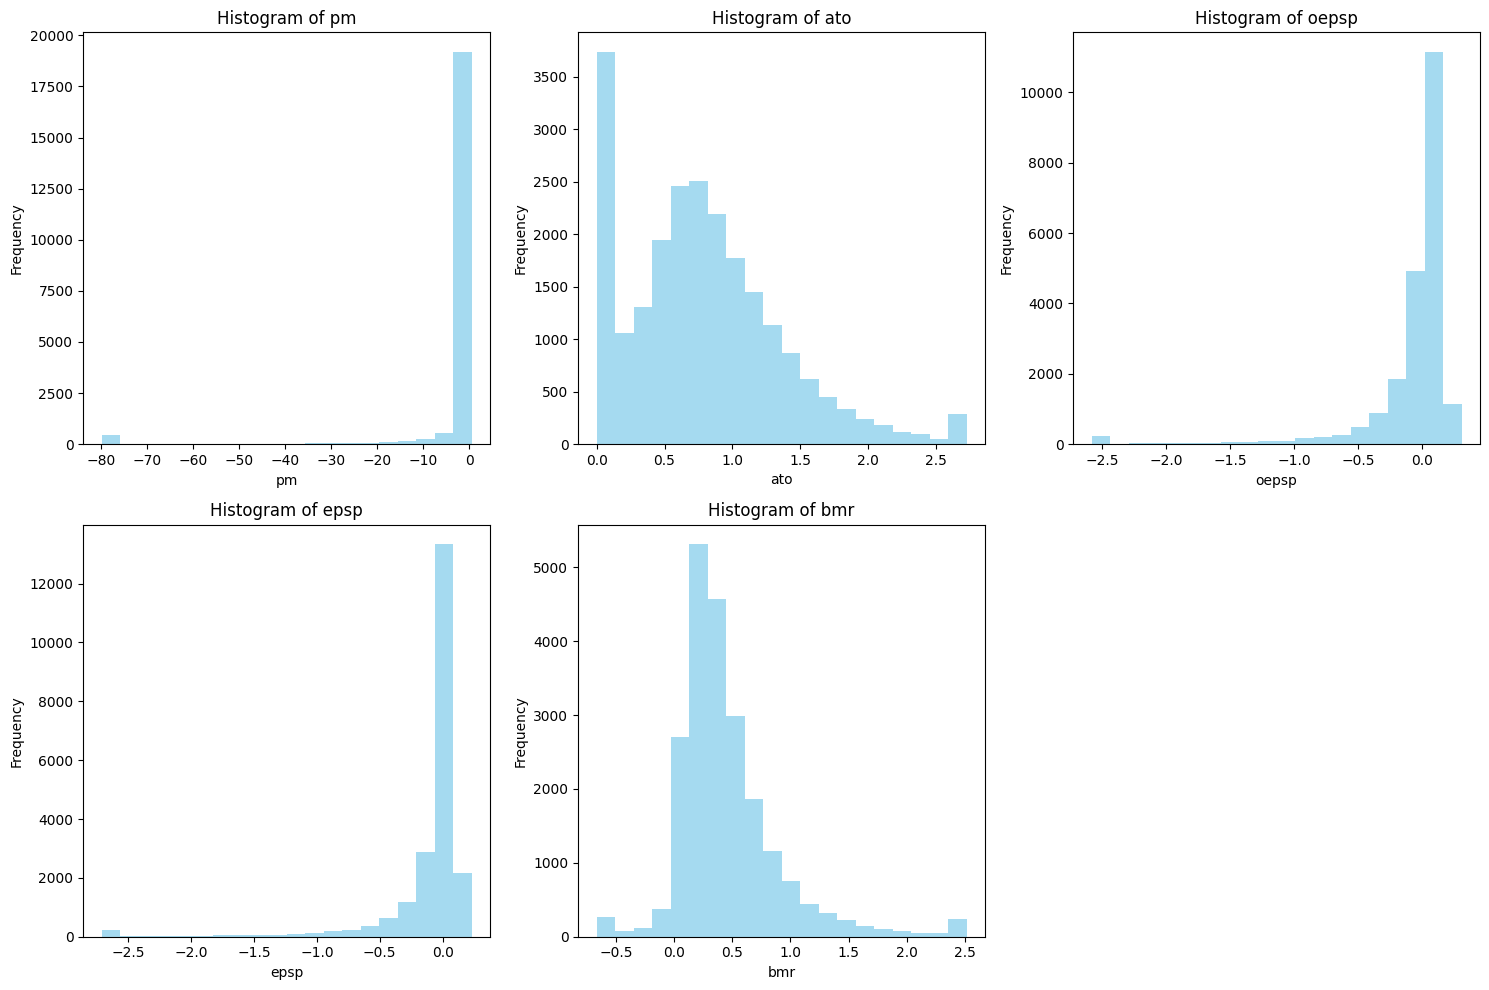

In [78]:
# Create histograms
var2plot=['pm','ato','oepsp','epsp','bmr']
plt.figure(figsize=(15, 10))
for i, column in enumerate(var2plot):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[column], bins=20, color='skyblue', alpha=0.75)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Si bien winsorizar 1%-99% No resolvió todos los problemas con datos extremos mejoró mucho la escala. A diferencia los histogramas sin winsorizar esta escala redujo significativamente el número de cifras de los valores extremos. Por ejemplo de esps de -3,000,000 a -2.5 o de -25,000 a -200.


### 1.2.3 Multicolinealidad


#### Matriz de correlación y VIF

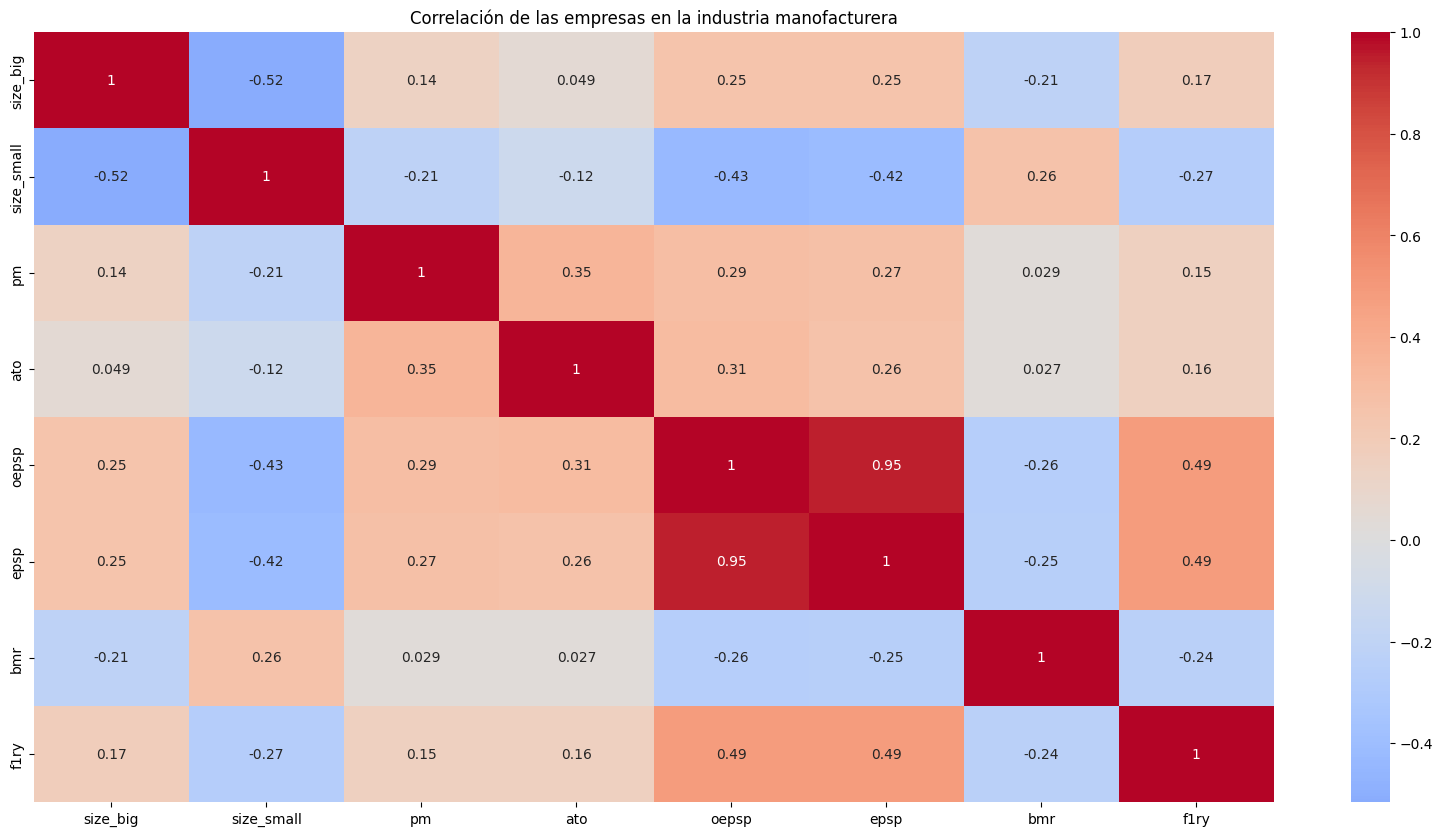

In [79]:
correlation_matrix = df.corr()
# Set up the heatmap figure
plt.figure(figsize = (20, 10))
# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)
# Show the plot
plt.title("Correlación de las empresas en la industria manofacturera")
plt.show()

Vemos que esps y oesps tienen un alto índice de correlación. Básicamente explican lo mismo en el modelo de regresión.

In [80]:
X = df[['size_big','size_small','pm','ato','oepsp','epsp','bmr']]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

     Variable        VIF
0       const   6.645762
1    size_big   1.375641
2  size_small   1.608709
3          pm   1.172803
4         ato   1.206360
5       oepsp  10.820608
6        epsp  10.350423
7         bmr   1.135540


Cómo era de esperarse tenemos que oespsp y espsp tienen alta relación. Para mejorar el modelo vamos a eliminar una variable en este caso oespsp. Para eliminarla.

In [81]:
df_winsorized_multicol = df.drop(["oepsp"], axis=1)

###1.2.4 Multiple regression model

#### Versión 2: Regresión después de winsorizar y tratar multicolinealidad.



In [82]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df=df_winsorized_multicol.copy()
#Solo las variables que nos importan
selected=['size_big','size_small','pm','ato','epsp','bmr']
X = df[selected]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()
# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Print the VIF values
print(vif_data)

     Variable       VIF
0       const  6.645704
1    size_big  1.375524
2  size_small  1.595825
3          pm  1.172037
4         ato  1.163163
5        epsp  1.335439
6         bmr  1.130204


Comprobamos que no tenemos multicolinealidad.

In [83]:
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:43:26   Log-Likelihood:                -17947.
No. Observations:               21021   AIC:                         3.591e+04
Df Residuals:                   21014   BIC:                         3.596e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0863      0.010      8.482      0.0

RESUMEN:
*   Una R^2 de 0.25 mejor que el 0.15 que obtuvimos antes de winsorizar.
*   Ya no ha alta colinealidad entre nuestrasa variables.
*   En este caso TODAS nuestras variables tienen |t values| mayores que 2. TODAS NUESTRAS VARIABLES SON SIGNIFICATIVAS para explicar el modelo.

Ideas:
*   A expeción de pm, ningún intervalo del 95% de confianza contiene el 0. Son mayores o menores que 1. Por lo que podemos decir que existen ciertos factores que afectan para aumentar los retornos trimestrales el próximo año.

Una empresa aumenta los retornos con evidencia estadistica si:
1.   Es una empresa grande en lugar de una empresa mediana. El retorno aumenta 0.01.
2.   Aumenta su asset turn over ratio. Por cada punto que aumenta el retorno sube 0.04.
3.   Aumenta su earnings per share deflated by stock price. Por cada punto que aumenta el retorno aumenta 0.66.

Una empresa decrese los retornos con evidencia estadistica si:
1.   Es una empresa pequeña en lugar de una empresa mediana. Tiene un 0.065 menos que una empresa mediana.
2.   Aumenta el ratio de valor de libro sobre valor de mercado. Por cada punto que este ratio aumenta, el retorno decrese 0.16.



#### Versión 3: Regresión con winsorización, colinealidad tratada y variables de interacción



Añadimos terminos de interacción
Para este modelo agregamos la interacción de earnings per share deflated by stock price con el tamaño de la empresa. Queremos comprobar que la etiqueta por tamaño de la empresa y esta variable explican mejor el modelo.

In [84]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df=df_winsorized_multicol.copy()
#Añadimos variables de interacción
df['epsp*big']=df['epsp']*df['size_big']
df['epsp*small']=df['epsp']*df['size_small']
#Seleccionamos las variables para el modelo
selected=['size_big','size_small','pm','ato','epsp','epsp*big','epsp*small','bmr']
X = df[selected]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()
# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Print the VIF values
print(vif_data)

     Variable        VIF
0       const   6.746073
1    size_big   1.462840
2  size_small   1.628611
3          pm   1.172745
4         ato   1.176364
5        epsp  21.625892
6    epsp*big   1.490300
7  epsp*small  20.901326
8         bmr   1.133198


In [85]:
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     890.2
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:43:26   Log-Likelihood:                -17935.
No. Observations:               21021   AIC:                         3.589e+04
Df Residuals:                   21012   BIC:                         3.596e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0810      0.010      7.903      0.0

**INTERPRETEMOS ESTE MODELO CON VARIABLES DE INTERACCION**
RESUMEN:
*   Una R^2 de 0.253 casi igual que 0.252 que obtuvimos antes, no presenta mejora significativa al tratar de predecir el modelo. Solo explica el 25% de la variabilidad del modelo.
*   Hay alta colinealidad entre la variable de interacción de empresa pequeña con su variable directa esps. Esto significa que esps explica la mismo en una empresa mediana. Pero la interpretación es distinta con la variables indirectas.

*   En este caso TODAS nuestras variables tienen |t values| mayores que 2. TODAS NUESTRAS VARIABLES SON SIGNIFICATIVAS para explicar el modelo.





#### Ecuación de regresión por cada tamaño de empresa:
*   Empresa mediana:    

**f1ry = (0.081     + 0.54*epsp -0.16*bmr + 0.04*ato + 0.001*pm)**
*   Empresa pequeña:

f1ry = (0.081-0.059) + (0.54+0.13)*epsp -0.16*bmr + 0.04*ato + 0.001*pm

**f1ry = (0.022     + 0.67*epsp -0.16*bmr + 0.04*ato + 0.001*pm)**
*   Empresa grande:

f1ry = (0.081+0.03)  + (0.54-0.13)4*epsp -0.16*bmr + 0.04*ato + 0.001*pm
     
**f1ry = (0.111     + 0.41*epsp -0.16*bmr + 0.04*ato + 0.001*pm)**


#### Sobre las variables de interacción:
* Podemos decir que la variable de interacción de una empresa pequeña sí es estadisticamente significativa y hace referencia a que, a comparación de la empresa mediana, una empresa pequeña tiene mayor earnings per share deflated by stock price. Dado que epsp es la variable con mayor t value, mayor coeficiente y su intervalo de confianza es positivo podemos afirmar que: **Una empresa pequeña tiene un mayor crecimiento en el retorno trimestral proyectado a un año cuando crece el epsp a comparación de una mediana de acuerdo a este modelo.**
* Por otra parte la variable de interacción de la empresa grande no es, ni estadisticamente significativa ni indica un claro comportamiento de epsp respecto a la empresa mediana.


#### Interpretación de los coeficientes:



Tengamos en cuenta que el grupo de empresas mediana es nuestro grupo base
*   const: 0.081. Cuando todos los coeficientes de la empresa mediana son 0. Una empresa mediana tiene un retorno trimestral proyectado a un año de 0.081.
*   size_big: 0.0301 . Sin tomar en cuenta los otros factores una empresa grande tiene un crecimiento de retorno anual trimestral 0.0301% más que una empresa mediana.
*   size_small: -0.0595
Sin tomar en cuenta los otros factores una empresa pequeña tiene 0.0595 menos crecimiento del retorno anual trimesral que una empresa mediana.
*   pm: 0.0010. Para una empresa si el pm aumenta también el retorno trimestral a un año en 0.001 por cada punto que el pm aumente.
*   ato: 0.0443. Para una empresa si el ato aumenta también el retorno trimestra a un año en 0.0443 por cada punto que el ato aumente.
*   epsp: 0.5441. Para una empresa mediana si el epsp aumenta también el retorno trimestra a un año en 0.5441 por cada punto que el epsp aumente.
Efectos de interacción de esps
*   epsp*big: -0.1383. Dado que esps de el grupo mediano es 0.54 significa que el rotrono anual trimestral en una empresa grande crece cuando el esps aumenta. Pero este retorno crece menos que en una empresa mediana.
*   epsp*small: 0.1389: Dado que el esps del grupo base (mediano) es 0.54. Vemos que si el esps de una empresa pequeña aumenta en un punto. El retorno trimestral a un año crece más por cada punto de lo que crece una empresa mediana.
*   bmr: -0.1608 En una empresa si el bmr aumenta las ventas trimestrale a un año disminuyen en 0.16 por cada punto que el bmr aumenta.

**Cabe destacar que |t|>2 en todos los coeficientes. Lo que significa que todas los coeficientes son estadisticamente significativos para explicar la variable independiente: Retornos trimestrales futuros a un año**


#### Versión 4: Regresión con winsorización, trada multicolinealidad y variables de interaccion esps con datos del último año.


In [86]:
df_winsorized_multicol.columns

Index(['size_big', 'size_small', 'pm', 'ato', 'epsp', 'bmr', 'f1ry'], dtype='object')

In [87]:
df=df_regression.copy()
#Filtro de años fiscal
df=df[df['qy']=='2022']
df.describe()

,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,f1rq,f4rq,f1ry,f4ry,size_big,size_medium,size_small,oepsp,epsp,bmr
count,1555.0,1.555000e+03,1.555000e+03,1.552000e+03,1.555000e+03,1.552000e+03,1.555000e+03,1.555000e+03,1.555000e+03,1.555000e+03,...,1494.000000,266.000000,1470.000000,265.000000,1555.000000,1555.000000,1555.000000,1493.000000,1493.000000,1496.000000
mean,12.0,4.612813e+06,2.996093e+06,9.699404e+05,-2.557595e+03,8.354202e+03,4.469294e+04,1.254434e+05,6.247282e+06,2.197347e+06,...,-0.040302,-0.001684,-0.457298,-0.047871,0.313183,0.254019,0.432797,-0.507570,-0.503412,0.649571
std,0.0,2.098337e+07,1.454361e+07,3.965331e+06,3.430205e+05,2.155353e+05,1.613846e+05,8.890296e+05,2.420246e+07,8.442011e+06,...,0.383234,0.224253,0.806640,0.613576,0.463937,0.435449,0.495623,1.663537,1.475451,1.136071
min,12.0,-4.180000e+02,0.000000e+00,-1.446480e+05,-5.803000e+06,-2.712000e+06,-4.450000e+05,-1.076738e+06,8.036900e+01,7.267000e+01,...,-2.340502,-1.226664,-5.251560,-2.414526,0.000000,0.000000,0.000000,-28.613363,-18.543485,-12.725555
25%,12.0,7.015000e+03,0.000000e+00,4.566367e+04,-1.056622e+03,0.000000e+00,-5.700000e+01,0.000000e+00,1.039295e+05,7.218600e+04,...,-0.180505,-0.093544,-0.786602,-0.291851,0.000000,0.000000,0.000000,-0.369811,-0.359650,0.206754
50%,12.0,2.211700e+05,9.216100e+04,1.516505e+05,0.000000e+00,0.000000e+00,8.980000e+02,3.440000e+02,4.678040e+05,2.887720e+05,...,-0.004041,0.007114,-0.247611,0.079859,0.000000,0.000000,0.000000,-0.037626,-0.040069,0.447168
75%,12.0,1.974900e+06,1.248178e+06,5.002210e+05,2.234000e+03,0.000000e+00,2.296850e+04,3.090000e+04,2.454192e+06,1.068000e+06,...,0.150359,0.122748,0.038360,0.309884,1.000000,1.000000,1.000000,0.063976,0.046387,0.852223
max,12.0,4.136800e+08,2.715680e+08,7.637500e+07,5.434000e+06,4.882000e+06,2.533000e+06,2.017600e+07,3.690670e+08,1.354050e+08,...,2.170957,0.940628,1.939161,1.704748,1.000000,1.000000,1.000000,0.859939,2.836554,13.381229


In [88]:
df=df_regression.copy()
#Filtro de años fiscal
df=df[df['qy']=='2022']

#Añadimos variables de interacción
df['epsp*big']=df['epsp']*df['size_big']
df['epsp*small']=df['epsp']*df['size_small']
#Wizorisation
analized=['size_big','size_small','pm','ato','epsp','epsp*big','epsp*small','bmr','f1ry']
df=df[analized]
columns_winzorization=['pm','ato','epsp','bmr']
low_quartile=         [0.02, 0.01,  0.01,  0.01]
high_quartile=        [0.99, 0.99,  0.99,  0.99]
for i in range(len(columns_winzorization)):
  percentile_1 = df[columns_winzorization[i]].quantile(low_quartile[i])
  percentile_99 = df[columns_winzorization[i]].quantile(high_quartile[i])
  df[columns_winzorization[i]]=df[columns_winzorization[i]].clip(lower=percentile_1, upper=percentile_99)
df.describe()
##Guardemos el dataset en df_regression_2022
df_regression_2022=df

In [89]:
selected=['size_big','size_small','pm','ato','epsp','epsp*big','epsp*small','bmr']
X = df[selected]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()

In [90]:
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     153.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          9.68e-188
Time:                        22:43:26   Log-Likelihood:                -1320.5
No. Observations:                1470   AIC:                             2659.
Df Residuals:                    1461   BIC:                             2707.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2351      0.039     -5.955      0.0

RESUMEN:
*   Una R^2 de 0.45 ha mejorado por mucho los modelos anteriores.
*   El tmaño de las empresas y el epsp son variables que explican con mayor confianza el modelo.

Ideas:
*   Con argumento estadistico una empresa pequeña gana menos que una empresa mediana y una grande gana más que una mediana en las mismas condiciones. Esto debido a que la constante b es menor, cuando una empresa es pequeña y mayor cuando es grande.
*   Así como en los modelos anteriores a mayor crecimiento de epsp más grandes son los retornos trimestrales en un año futuro.

Hasta el momento este fue el mejor modelo, hicimos limpieza de valores extremos,, agregamos una variable categórica de acuerdo al tamaño,  eliminamos multicolinealidad y añadimos una variable de interacción con nuestra variable con mayor significancia en el modelo.

### 1.2.5 Regression Diagnosis


In [91]:
influence = model.get_influence()
# Get the summary frame
summary_frame = influence.summary_frame()
# Display the summary frame
print(summary_frame[['cooks_d','standard_resid','hat_diag','student_resid']])

             cooks_d  standard_resid  hat_diag  student_resid
91      1.472513e-05        0.232149  0.002453       0.232074
186     4.457574e-04       -1.054732  0.003593      -1.054773
756     4.573456e-04        0.677151  0.008897       0.677025
851     3.523758e-04        1.055649  0.002838       1.055690
1135    5.763180e-05       -0.427682  0.002828      -0.427562
...              ...             ...       ...            ...
531755  5.631336e-04       -1.144778  0.003852      -1.144900
532325  5.761429e-07       -0.044900  0.002565      -0.044885
532705  1.187722e-04        0.442035  0.005441       0.441914
532895  1.292965e-04       -0.655516  0.002701      -0.655388
532990  2.875617e-04       -0.927673  0.002998      -0.927629

[1470 rows x 4 columns]


#### Coeficientes con algebra matricial y lo comparamos con el modelo OLS de la libreria stats


In [92]:
df=df_regression_2022.copy()
df=df.dropna()
analized=['size_big','size_small','pm','ato','epsp','epsp*big','epsp*small','bmr']
X = df[selected]
X = sm.add_constant(X)
# Define your target variable (dependent variable)
y = df["f1ry"]
beta = np.linalg.inv((X.values).T @ X.values)@ (X.values).T @ y.values
coef = np.array(["{:.3f}".format(x) for x in beta.flatten().astype(float)], dtype=np.float64)
print(coef)
print(model.params)

[-0.272  0.103 -0.242  0.     0.093  0.482  0.404 -0.093 -0.025]
const        -0.235051
size_big      0.091163
size_small   -0.230841
pm            0.000726
ato           0.046865
epsp          0.329389
epsp*big      0.569405
epsp*small    0.061351
bmr           0.005341
dtype: float64


#### Hat Matrix con algebra matricial

In [93]:
hat_m = (X.values) @ np.linalg.inv((X.values).T @ X)@ (X.values).T
hat_m

array([[ 2.50948051e-03,  2.29984499e-03, -8.60440526e-04, ...,
         2.55878562e-03, -7.07874382e-05,  2.49109482e-03],
       [ 2.29984499e-03,  3.81464343e-03,  2.38613104e-03, ...,
         2.12302595e-03,  8.45302333e-05,  2.64492236e-03],
       [-8.60440526e-04,  2.38613104e-03,  1.36653405e-02, ...,
        -1.08883302e-03, -7.15353029e-04,  6.27833432e-04],
       ...,
       [ 2.55878562e-03,  2.12302595e-03, -1.08883302e-03, ...,
         2.66516394e-03, -3.69910147e-04,  2.57396385e-03],
       [-7.07874382e-05,  8.45302333e-05, -7.15353029e-04, ...,
        -3.69910147e-04,  5.86570896e-03, -9.26169713e-04],
       [ 2.49109482e-03,  2.64492236e-03,  6.27833432e-04, ...,
         2.57396385e-03, -9.26169713e-04,  2.80388533e-03]])

#### Leverage observations

La diagonal de la hat matrix indica el levarage de cada observación. Es decir, que tan alejado está del promedio de la muestra. De acuerdo a la literatura un leverage value es extremo si hii>3(k+1/n)

In [94]:
k = 8
n = 1470
leverage_points = summary_frame[summary_frame["hat_diag"] > 3* (k + 1) / n]

# Print the leverage points
print(leverage_points)

        dfb_const  dfb_size_big  dfb_size_small    dfb_pm   dfb_ato  dfb_epsp  \
6738    -0.032630     -0.010087       -0.089362 -0.092743  0.081296  0.339964   
9493     0.003833     -0.002531        0.016622  0.005031 -0.011026  0.088358   
15001    0.059792     -0.030489       -0.022087  0.303420 -0.046261  0.010244   
16333   -0.011987      0.005181        0.000911 -0.040779  0.005814  0.004600   
21558   -0.002007      0.004686        0.012902  0.042172 -0.003988  0.000744   
...           ...           ...             ...       ...       ...       ...   
494421   0.026893     -0.003840        0.022205 -0.013901 -0.035146  0.084022   
508101   0.050428     -0.026681       -0.030826  0.267011 -0.030936 -0.027542   
515415  -0.054288      0.020372        0.011204 -0.041989 -0.012081  0.036571   
523490   0.002511      0.017769        0.009270 -0.000262  0.014200 -0.005398   
527954  -0.044547      0.005225       -0.030123  0.017524  0.065553 -0.134188   

        dfb_epsp*big  dfb_e

#### Outliers usando studentized residuals

Al estandarizar los errores obtenomos nuevamente una dristribución normal, tomar como criterio que un valor quede entre 2 y 3 std nos indica que estamos abaracando el 95% o 99% de la muestra. En este caso tomaremos el 3 como referencia e identificaremos los valores atipicos

In [95]:
valores_extremos=summary_frame[abs(summary_frame['student_resid'])>3]
valores_extremos['student_resid']


6738     -3.377362
14813    -3.573218
66974     4.363641
67639     4.288609
77709    -5.419380
79609     3.289480
155551    3.139541
168661   -3.727079
194311   -4.790628
254051    3.651763
255001   -4.231989
261177    6.139981
330228   -3.082889
338496   -3.207196
359870   -3.269178
384946   -3.061154
429933   -3.367909
462328   -3.740380
462613    3.222875
489291    3.066436
495656   -3.376626
500501    3.347635
Name: student_resid, dtype: float64

####  outliers usando Cook’s distance

Cook's distance es una medida que toma en cuenta los errores y leverage points para calcular que tanta influencia tiene un punto sobre el modelo si es eliminado.Una medida sugiere que un punto es influenciable si está por encima de 4/n donde n es el numero de observaciones


In [96]:
cooks_d=summary_frame[summary_frame['cooks_d']>4/n]
cooks_d['cooks_d']

6263      0.003401
6738      0.025772
14813     0.014659
15001     0.011388
18993     0.003980
            ...   
500501    0.004844
508101    0.008646
515415    0.020181
523490    0.005096
527954    0.004476
Name: cooks_d, Length: 92, dtype: float64

#### Puntos influenciables con cook distances y studentized residuals





Para crear un último modelo de regresión camos a eliminar los outliers usando cooks_d y student_residuals.

In [97]:
df=df_regression_2022
selected=['size_big','size_small','pm','ato','epsp','epsp*big','epsp*small','bmr']
X = df[selected]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()

influence = model.get_influence()
# Get the summary frame
summary_frame = influence.summary_frame()

filter=summary_frame[(summary_frame['cooks_d']>4/n) & (abs(summary_frame['student_resid'])>3)]
filter_index=filter.index.tolist()

df_no_influential=df_regression_2022.drop(filter_index)
df_no_influential.describe()

,size_big,size_small,pm,ato,epsp,epsp*big,epsp*small,bmr,f1ry
count,1533.000000,1533.000000,1310.000000,1533.000000,1471.000000,1471.000000,1471.000000,1474.000000,1448.000000
mean,0.317025,0.426614,-6.836185,0.606719,-0.436908,0.013008,-0.475008,0.661097,-0.439190
std,0.465469,0.494747,24.871781,0.545883,1.086759,0.052853,1.401335,0.818758,0.748741
min,0.000000,0.000000,-144.054947,0.000000,-6.411460,-0.642027,-18.543485,-1.203537,-5.072438
25%,0.000000,0.000000,-0.906216,0.087820,-0.345383,0.000000,-0.290135,0.209587,-0.764628
50%,0.000000,0.000000,0.003449,0.541740,-0.036439,0.000000,0.000000,0.448999,-0.246812
75%,1.000000,1.000000,0.090891,0.914381,0.046793,0.000000,0.000000,0.851356,0.037797
max,1.000000,1.000000,0.761428,2.391219,0.325607,0.663331,2.116301,4.279710,1.498872


#### Registro de las empresas que muestran outliers con cooks_d y studemt_resid

In [98]:
data.loc[filter_index][["firm","Empresa"]]


,firm,Empresa
6738,ACRX,Acelrx Pharmaceuticals Inc
14813,AGRX,Agile Therapeutics Inc
66974,BLPH,"Bellerophon Therapeutics, Inc"
67639,BMEA,"Biomea Fusion, Inc"
77709,BWV,"Blue Water Biotech, Inc"
79609,CABA,"Cabaletta Bio, Inc"
155551,ELEV,"Elevation Oncology, Inc"
168661,EVLO,"Evelo Biosciences, Inc"
194311,FWBI,"First Wave Biopharma, Inc"
254051,IVC_old,Invacare Hldg Corp


#### Versión 5: Regresión sin puntos influenciables.

Este es nuestro último modelo. Donde además de todo el tratamiento de colinealidad, valores extremos y variables de interacción quitamos puntos influenciables.

In [99]:
df=df_no_influential.copy()
selected=['size_big','size_small','pm','ato','epsp','epsp*big','epsp*small','bmr']
X = df[selected]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.26e-210
Time:                        22:43:34   Log-Likelihood:                -1133.8
No. Observations:                1448   AIC:                             2286.
Df Residuals:                    1439   BIC:                             2333.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2293      0.036     -6.444      0.0

RESUMEN:
*   Una R^2 de 0.50 el mejor modelo que encontramos fue sin puntos indfluenciables.
*   El tamaño de la empresa y el esps siguen siendo los factores más confiables para la descrupción del modelo.

Ideas:
*   La diferencia con el modelo anterior es que a pesar de que hemos eliminado valores muy extremos con la winsorización sigue habiendo algunos puntos más que no ayudan a la predicción del modelo y son más dificiles de detectar. Pero con cooks distance y studentized podemos mejorar hasta un 5 punto porcetuales simplimente aplicando un flitro de estos valores

## Conclusión


A lo largo de este documento hemos ido paso a paso para entender no solo el estado financiero de EU, también de su industria manofacturera. Hemos ido iterando sobre un modelo de regresión lineal multiple y pasamos de una r^2 de menos de 0.25 a una de 0.5. Esto nos hace ver que detrás de un modelo de predicción existen muchas herramientas y técnicas para obtener información en los datos que no es trival ver, así como un data managment adecuado es crucial para la eficacia de un modelo.